In [112]:
import torch
from time import time
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt
from zipfile import ZipFile
import numpy as np
from time import time
from torchvision import datasets
from torchvision import transforms
import pandas as pd
import numpy as np
import zipfile
import os
from torchvision.io import read_image

In [113]:
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
print(torch.cuda.is_available())

1
0
NVIDIA GeForce GTX 1050 Ti
True


In [114]:
def read_csvfile(filename):
    with zipfile.ZipFile("RHC.zip") as z:
   # open the csv file in the dataset
       with z.open(filename) as f:
        return pd.read_csv(f)       

In [115]:
points_all_df=read_csvfile('points_all.csv')
image_list_df=read_csvfile('image_list.csv')
points_inroom_df=read_csvfile('points_inroom.csv')
image_trainlist_df=pd.read_csv(r"F:\New folder (2)\RHC\img_train_list.csv")


In [116]:
print(len(points_all_df))
points_all_df.head()

5581


,FILENAME,X,Y
0,20180416_2_1029.58745.jpg,377,179
1,20180416_2_1029.58745.jpg,369,200
2,20180416_2_1170.0.jpg,421,93
3,20180416_2_1170.0.jpg,430,124
4,20180416_2_1170.0.jpg,386,155


In [117]:
print(len(points_inroom_df))
points_inroom_df.head()

4904


,FILENAME,X,Y
0,20180226_0.0.jpg,208,198
1,20180226_0.0.jpg,400,138
2,20180226_1015.11135.jpg,233,206
3,20180226_1015.11135.jpg,296,162
4,20180226_1015.11135.jpg,301,144


In [118]:
print(len(image_list_df))
image_list_df.head()
# IMAGE LIST COUNT VALUE IS INROOM COUNT ONLY

1195


,image_name,count,type
0,20180227_570.0.jpg,5,test
1,20180226_2998.761014716.jpg,12,test
2,20180516_1239.8525.jpg,3,test
3,20180404_18759.4638.jpg,0,test
4,20180424_5357.6437499.jpg,9,test


In [119]:
print(len(image_trainlist_df))
image_trainlist_df.head()

717


,20180226_0.0.jpg
0,20180226_1015.11135.jpg
1,20180226_1320.6303.jpg
2,20180226_2_10622.5747999.jpg
3,20180226_2_11150.821884018.jpg
4,20180226_2_11172.896408888.jpg


In [120]:
# PUT TRAIN, TEST, VAL IN PLACE OF DATA IN STRING
def check_annocsv_for_all(data):
    path=r"F:\New folder (2)\RHC\anno\all\den"
    dir=path+'\\'+data
    for i in os.listdir(dir):
        a=pd.read_csv(path+'\\'+data+'\\'+i,header=None)
        break
    return a
# PUT TRAIN, TEST, VAL IN PLACE OF DATA IN STRING
def check_annocsv_for_inroom(data):
    path=r"F:\New folder (2)\RHC\anno\inroom\den"
    dir=path+'\\'+data
    for i in os.listdir(dir):
        a=pd.read_csv(path+'\\'+data+'\\'+i,header=None)
        break
    return a

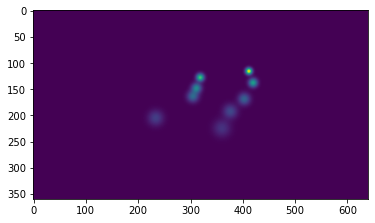

In [121]:
from PIL import Image as im
a=check_annocsv_for_inroom('val')
a_array=np.array(a)
plt.imshow(a_array)


In [122]:
# PUT r in front of directorym
def show_density_map(annot_csv_directory):
    a1=pd.read_csv(annot_csv_directory,header=None)
    return plt.imshow(np.array(a1))

In [123]:
# dataset for image and densitymap
# DATATYPE IS TRAIN OR VAL OR TEST
# EXTRACTING TAIN DATA
def collect_data(datatype):
    image_dir=r"F:\New folder (2)\RHC\img"+'\\'+datatype
    images_all=[]
    density_map_all=[]
    for i in os.listdir(image_dir):
        tsr_img1 = torchvision.io.read_image(image_dir+'\\'+i)
        images_all.append(tsr_img1)
        anno_dir=r"F:\New folder (2)\RHC\anno\all\den"+'\\'+datatype
        d1=pd.read_csv(anno_dir+'\\'+i[:-3]+'csv',header=None)
        density_map_all.append(torch.tensor(np.array(d1)))
    return images_all,density_map_all
class MyDataset(Dataset):
    def __init__(self, data, targets,transform=None, target_transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform
        self.target_transform = target_transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            y = self.target_transform(y)
        return x, y
    
    def __len__(self):
        return len(self.data)

In [124]:
## GETTING TRAINING DATA
train_images,train_density_map=collect_data('train')
train_data=MyDataset(train_images,train_density_map,transform=None)   

In [125]:
test_images,test_density_map=collect_data('test')
test_data=MyDataset(test_images,test_density_map,transform=None)

In [126]:
val_images,val_density_map=collect_data('val')
val_data=MyDataset(val_images,val_density_map,transform=None)

In [129]:
print(len(train_data))
print(len(test_data))
print(len(val_data))
print('TOTAL IS ',len(train_data)+len(test_data)+len(val_data))

717
239
239
TOTAL IS  1195


In [130]:
def check_image_and_label(data,index):
    x,y=data[index]
    plt.imshow(x.permute(1,2,0))
    plt.show()
    plt.imshow(y)
    plt.show
    

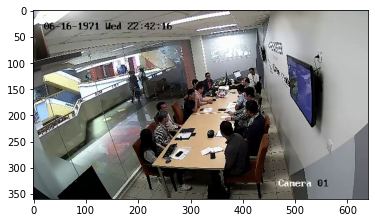

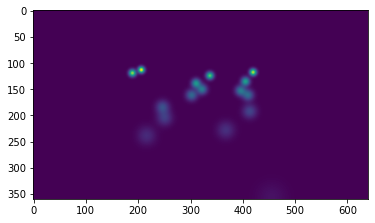

In [136]:
check_image_and_label(val_data,11)

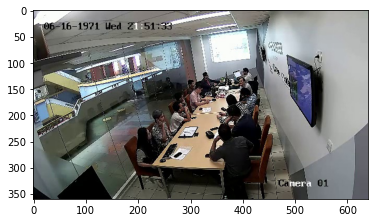

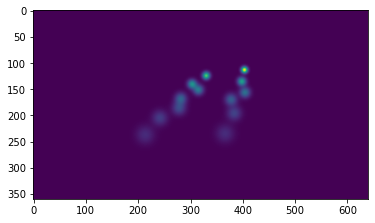

In [135]:
check_image_and_label(test_data,11)

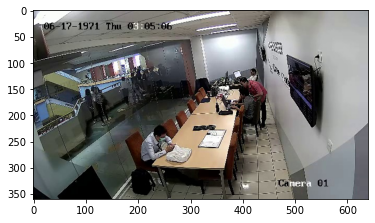

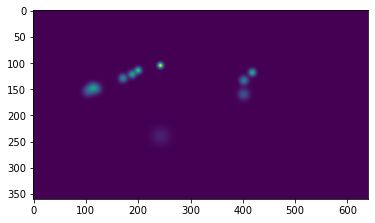

In [137]:
check_image_and_label(train_data,11)